In [ ]:
# Task2 - Clean and Visualize Titanic Dataset

In [1]:
# Install required libraries
!pip install seaborn
!pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [2]:
# import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [42]:
# Load Titanic dataset
df = sns.load_dataset('titanic')

In [43]:
# view dataset
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [44]:
# view dataset insights
df.shape

(891, 15)

In [45]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [47]:
# Handle Missng Values
print(df.isnull().sum() / len(df) * 100)   # missing values percentage 

survived        0.000000
pclass          0.000000
sex             0.000000
age            19.865320
sibsp           0.000000
parch           0.000000
fare            0.000000
embarked        0.224467
class           0.000000
who             0.000000
adult_male      0.000000
deck           77.216611
embark_town     0.224467
alive           0.000000
alone           0.000000
dtype: float64


In [48]:
# Drop 'deck' due to high % of missing values
df.drop(columns='deck', inplace=True)

In [49]:
# Fill 'embarked' and 'embark_town'  with mode 
df['embarked'] = df['embarked'].fillna(df['embarked'].mode()[0])
df['embark_town'] = df['embark_town'].fillna(df['embark_town'].mode()[0])

In [50]:
df['age'] = df['age'].fillna(df['age'].mean()) # fill 'age' with mean

In [52]:
df.isna().sum()  

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    0
alive          0
alone          0
dtype: int64

In [53]:
# convert categorical cols in to numeric
# identify categorical columns
cat_cols = df.select_dtypes(include=['object', 'category']).columns

for col in cat_cols:
    df[col] = df[col].astype('category').cat.codes


In [62]:
df[cat_cols].info() # view the results  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   sex          891 non-null    int8 
 1   embarked     891 non-null    int8 
 2   class        891 non-null    int8 
 3   who          891 non-null    int8 
 4   embark_town  891 non-null    int8 
 5   alive        891 non-null    int8 
dtypes: int8(6)
memory usage: 5.3 KB


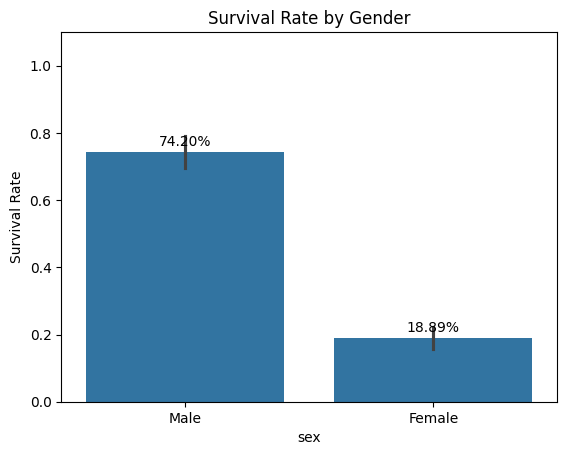

In [64]:
# survival rate by gender
ax = sns.barplot(x='sex', y='survived', data=df)

plt.xticks([0, 1], ['Male', 'Female'])  # set positions & labels together

plt.title('Survival Rate by Gender')
plt.ylabel('Survival Rate')

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 0.02, f'{height:.2%}', ha='center')

plt.ylim(0, 1.1)
plt.show()

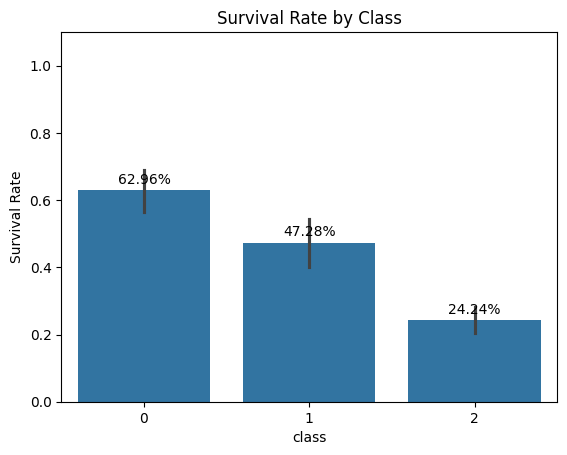

In [65]:
#  survival rate by class
ax = sns.barplot(x='class', y='survived', data=df)
plt.title('Survival Rate by Class')
plt.ylabel('Survival Rate')

# To add percentage labels above bars
for p in ax.patches:
    height = p.get_height()
    ax.text(
        p.get_x() + p.get_width() / 2., 
        height + 0.02,                  
        f'{height:.2%}',                
        ha='center'
    )

plt.ylim(0, 1.1)  
plt.show()


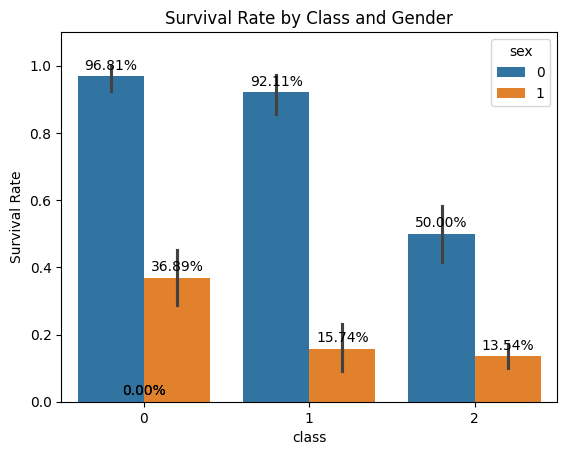

In [66]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot survival rate by class, grouped by sex
ax = sns.barplot(x='class', y='survived', hue='sex', data=df)

plt.title('Survival Rate by Class and Gender')
plt.ylabel('Survival Rate')
plt.ylim(0, 1.1)

# Add percentage labels on each bar
for p in ax.patches:
    height = p.get_height()
    ax.text(
        p.get_x() + p.get_width() / 2.,  
        height + 0.02,                   
        f'{height:.2%}',                
        ha='center'
    )

plt.show()
